In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
np.random.seed(1429)
from sklearn.utils import resample
import seaborn as sns
plt.rcParams['figure.figsize']=10,6
from scipy.stats import norm
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("Banking.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df["Target"]=df.y

In [5]:
df=df.drop("y", axis=1)

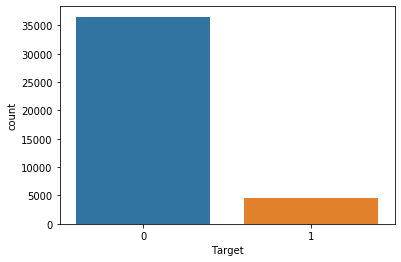

In [6]:
sns.countplot(x=df.Target)
#class imabalance noted

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

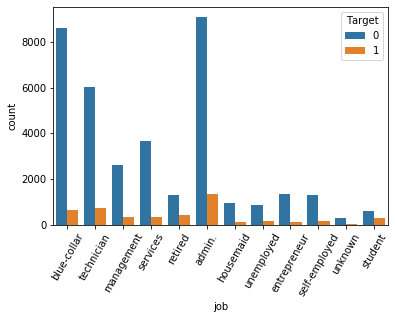

In [7]:
sns.countplot(x=df.job, hue=df.Target)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

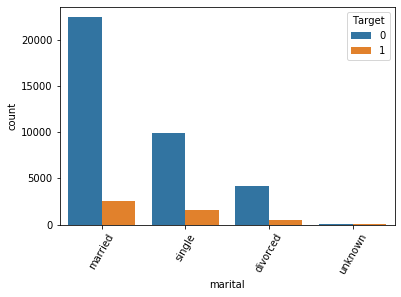

In [8]:
sns.countplot(x=df.marital, hue=df.Target)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

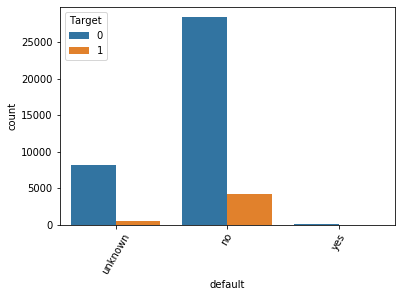

In [9]:
sns.countplot(x=df.default, hue=df.Target)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

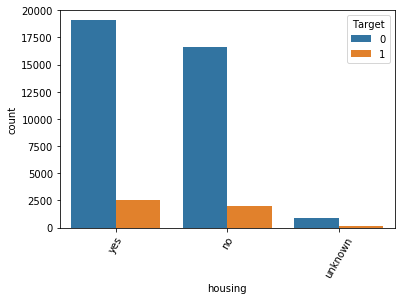

In [10]:
sns.countplot(x=df.housing, hue=df.Target)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

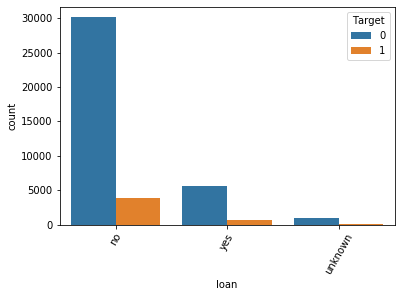

In [11]:
sns.countplot(x=df.loan, hue=df.Target)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

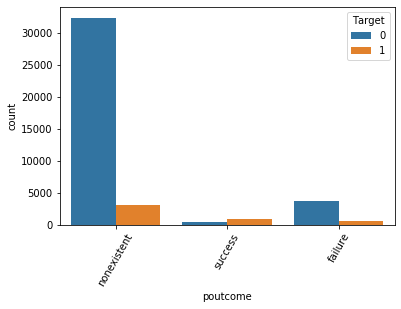

In [12]:
sns.countplot(x=df.poutcome, hue=df.Target)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

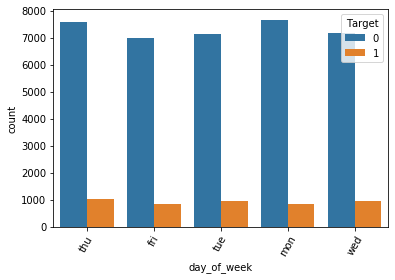

In [13]:
sns.countplot(x=df.day_of_week, hue=df.Target)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

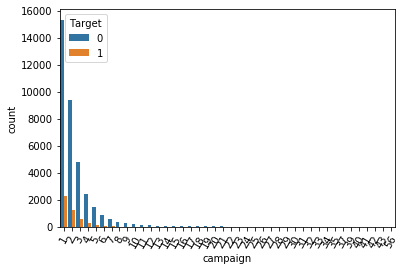

In [14]:
sns.countplot(x=df.campaign, hue=df.Target)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

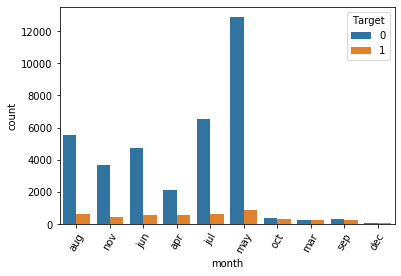

In [15]:
sns.countplot(x=df.month, hue=df.Target)
plt.xticks(rotation=60)

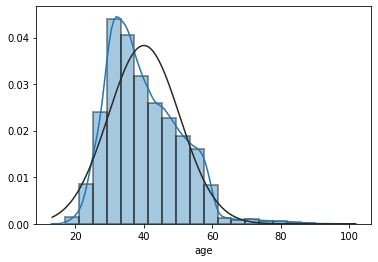

In [16]:
sns.distplot(df.age, fit=norm, bins=20,hist_kws={'edgecolor':'k', 'lw':2} )

In [17]:
df.poutcome=df.poutcome.astype('category')
df.month=df.month.astype('category')
df.contact=df.contact.astype('category')
df.previous=df.previous.astype('category')
df.job=df.job.astype('category')
df.default=df.default.astype('category')
df.education=df.education.astype('category')
df.marital=df.marital.astype('category')
df.housing=df.housing.astype('category')
df.loan=df.loan.astype('category')
df.day_of_week=df.day_of_week.astype('category')

In [18]:
dum=pd.get_dummies(df.loc[:,[
 'poutcome',
 'month',
 'contact',
 'job',
 'default',
 'education',
 'marital',"housing",'loan',"day_of_week","previous"]], drop_first=True)

In [19]:
DF=pd.concat([df,dum], axis=1)

In [20]:
DF.drop(labels=[
 'poutcome',
 'month',
 'contact',
 'job',
 'default',
 'education',
 'marital',"housing",'loan',"day_of_week","previous"], inplace=True, axis=1)

In [21]:
DF.columns

Index(['age', 'duration', 'campaign', 'pdays', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'Target',
       'poutcome_nonexistent', 'poutcome_success', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'contact_telephone', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'default_unknown', 'default_yes',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'marital_married',
       'marital_single', 'marital_unknown', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week

In [22]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
#to find information values strictly for binary response and logistic regression
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [23]:
final_iv, IV = data_vars(DF,DF.Target)
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,17.0,38.0,21175,2523,0.119150,18652,0.880850,0.543750,0.510343,0.063407,4.479019e-03
1,age,39.0,98.0,20013,2117,0.105781,17896,0.894219,0.456250,0.489657,-0.070665,4.479019e-03
2,duration,0.0,36.0,2092,0,0.000000,2092,1.000000,0.000000,0.057240,0.000000,1.625228e+00
3,duration,37.0,59.0,2089,1,0.000479,2088,0.999521,0.000216,0.057130,-5.580050,1.625228e+00
4,duration,60.0,75.0,2133,11,0.005157,2122,0.994843,0.002371,0.058061,-3.198307,1.625228e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
132,previous_5,1.0,1.0,18,13,0.722222,5,0.277778,0.002802,0.000137,3.019424,8.053628e-03
133,previous_6,0.0,0.0,41183,4637,0.112595,36546,0.887405,0.999353,0.999945,-0.000592,1.461800e-03
134,previous_6,1.0,1.0,5,3,0.600000,2,0.400000,0.000647,0.000055,2.469377,1.461800e-03
135,previous_7,0.0,0.0,41187,4640,0.112657,36547,0.887343,1.000000,0.999973,0.000027,7.486498e-10


In [24]:
IV=IV.sort_values("IV",ascending=False)
IV=IV[IV.IV>=0.02]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

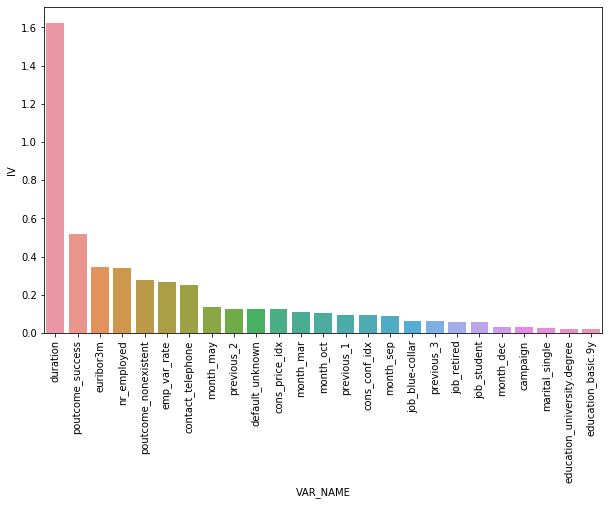

In [25]:
plt.rcParams['figure.figsize']=10,6
sns.barplot(x="VAR_NAME", y="IV",data=IV)
plt.xticks(rotation=90)

In [26]:
list(IV.VAR_NAME)

['duration',
 'poutcome_success',
 'euribor3m',
 'nr_employed',
 'poutcome_nonexistent',
 'emp_var_rate',
 'contact_telephone',
 'month_may',
 'previous_2',
 'default_unknown',
 'cons_price_idx',
 'month_mar',
 'month_oct',
 'previous_1',
 'cons_conf_idx',
 'month_sep',
 'job_blue-collar',
 'previous_3',
 'job_retired',
 'job_student',
 'month_dec',
 'campaign',
 'marital_single',
 'education_university.degree',
 'education_basic.9y']

In [27]:
DF=DF.loc[:,['duration',
 'poutcome_success',
 'euribor3m',
 'nr_employed',
 'poutcome_nonexistent',
 'emp_var_rate',
 'contact_telephone',
 'month_may',
 'previous_2',
 'default_unknown',
 'cons_price_idx',
 'month_mar',
 'month_oct',
 'previous_1',
 'cons_conf_idx',
 'month_sep',
 'job_blue-collar',
 'previous_3',
 'job_retired',
 'job_student',
 'month_dec',
 'campaign',
 'marital_single',
 'education_university.degree',
 'education_basic.9y',"Target"]]

In [28]:
X=DF.loc[:,['duration',
 'poutcome_success',
 'euribor3m',
 'nr_employed',
 'poutcome_nonexistent',
 'emp_var_rate',
 'contact_telephone',
 'month_may',
 'previous_2',
 'default_unknown',
 'cons_price_idx',
 'month_mar',
 'month_oct',
 'previous_1',
 'cons_conf_idx',
 'month_sep',
 'job_blue-collar',
 'previous_3',
 'job_retired',
 'job_student',
 'month_dec',
 'campaign',
 'marital_single',
 'education_university.degree',
 'education_basic.9y']]
y=DF.loc[:,"Target"]


X=DF.loc[:,['duration',
 'poutcome_success',
 'emp_var_rate',
 'contact_telephone',
 'month_may',
 'previous_2',
 'default_unknown',
 'month_mar',
 'month_oct',
 'previous_1',
 'month_sep',
 'job_blue-collar',
 'previous_3',
 'job_retired',
 'job_student',
 'month_dec',
 'campaign',
 'marital_single',
 'education_university.degree',
 'education_basic.9y']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif


In [29]:
glm=LogisticRegression()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1429)

In [31]:
sc=StandardScaler()

In [32]:
X_train_skl=sc.fit_transform(X_train)

In [33]:
glm.fit(X_train_skl, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred=glm.predict(X_test)

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10980
           1       0.41      0.50      0.45      1377

    accuracy                           0.86     12357
   macro avg       0.67      0.71      0.69     12357
weighted avg       0.88      0.86      0.87     12357



In [36]:
print("AUC is {:.2f}%".format(roc_auc_score(y_test, glm.predict_proba(X_test)[:,1])*100))
AUC=roc_auc_score(y_test, glm.predict_proba(X_test)[:,1])

AUC is 82.60%


In [37]:
fpr, tpr, th=roc_curve(y_test, glm.predict_proba(X_test)[:,1])

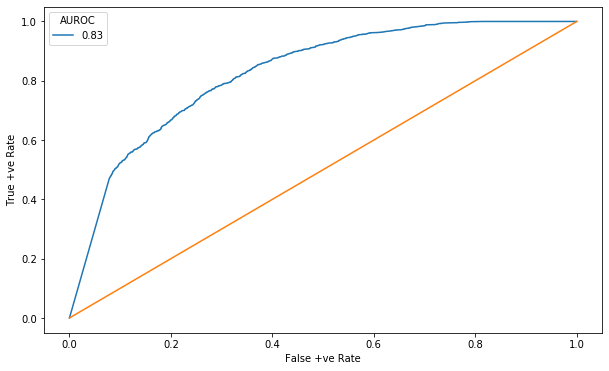

In [38]:
sns.lineplot(fpr,tpr)
sns.lineplot([0,1], [0,1])
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend(title='AUROC', labels=[np.round(AUC,2)])

array([[9975, 1005],
       [ 682,  695]], dtype=int64)

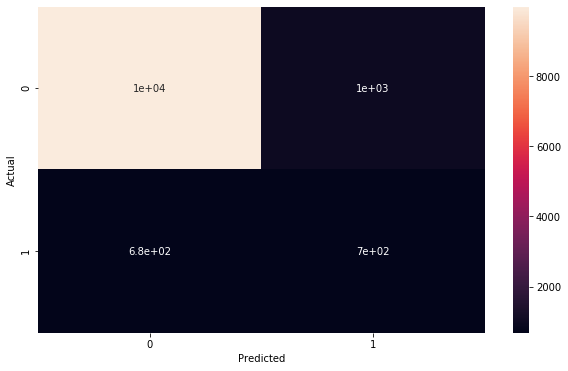

In [39]:
cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.ylim(2,0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
cm

In [40]:
df_train=pd.concat([X_train, y_train], axis=1)

In [41]:
df_train.Target.value_counts()

0    25568
1     3263
Name: Target, dtype: int64

In [42]:
zero=df_train.loc[df_train.Target==0,:]
one=df_train.loc[df_train.Target==1,:]

In [43]:
ones_upsampled=resample(one, replace=True, n_samples=len(zero), random_state=1429)

In [44]:
zero.shape

(25568, 26)

In [45]:
ones_upsampled.shape

(25568, 26)

In [46]:
df_train_up=pd.concat([zero, ones_upsampled], axis='rows')

In [47]:
zero_downsampled=resample(zero, replace=False, n_samples=len(one), random_state=1429)

In [48]:
zero_downsampled.shape

(3263, 26)

In [49]:
one.shape

(3263, 26)

In [50]:
df_train_down=pd.concat([zero_downsampled, one], axis='rows')

In [51]:
smt=SMOTE(random_state=1429, ratio=1, n_jobs=-1)

In [52]:
X_sm_train, y_sm_train = smt.fit_sample(X_train, y_train)
X_sm_train = pd.DataFrame(data=X_sm_train,columns=X_train.columns )
y_sm_train= pd.DataFrame(data=y_sm_train,columns=['Target'])

In [53]:
X_sm_train.shape

(51136, 25)

In [54]:
y_sm_train.shape

(51136, 1)

In [55]:
X_re_up=df_train_up.loc[:,['duration', 'poutcome_success', 'euribor3m', 'nr_employed',
       'poutcome_nonexistent', 'emp_var_rate', 'contact_telephone',
       'month_may', 'previous_2', 'default_unknown', 'cons_price_idx',
       'month_mar', 'month_oct', 'previous_1', 'cons_conf_idx', 'month_sep',
       'job_blue-collar', 'previous_3', 'job_retired', 'job_student',
       'month_dec', 'campaign', 'marital_single',
       'education_university.degree', 'education_basic.9y']]
y_re_up=df_train_up.loc[:,'Target']

In [56]:
X_re_down=df_train_down.loc[:,['duration', 'poutcome_success', 'euribor3m', 'nr_employed',
       'poutcome_nonexistent', 'emp_var_rate', 'contact_telephone',
       'month_may', 'previous_2', 'default_unknown', 'cons_price_idx',
       'month_mar', 'month_oct', 'previous_1', 'cons_conf_idx', 'month_sep',
       'job_blue-collar', 'previous_3', 'job_retired', 'job_student',
       'month_dec', 'campaign', 'marital_single',
       'education_university.degree', 'education_basic.9y']]
y_re_down=df_train_down.loc[:,'Target']

In [57]:
X_re_up_skl=sc.fit_transform(X_re_up)
X_re_down_skl=sc.fit_transform(X_re_down)

In [58]:
glm.fit(X_re_up_skl,y_re_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
pup=glm.predict(X_test)

In [60]:
print(classification_report(y_test, pup))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     10980
           1       0.34      0.58      0.43      1377

    accuracy                           0.83     12357
   macro avg       0.64      0.72      0.66     12357
weighted avg       0.87      0.83      0.85     12357



In [61]:
glm.fit(X_re_down_skl,y_re_down)
pud=glm.predict(X_test)
print(classification_report(y_test, pud))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10980
           1       0.55      0.20      0.29      1377

    accuracy                           0.89     12357
   macro avg       0.73      0.59      0.62     12357
weighted avg       0.87      0.89      0.87     12357



In [62]:
glm.fit(X_sm_train,y_sm_train)
psm=glm.predict(X_test)
print(classification_report(y_test, psm))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10980
           1       0.44      0.88      0.58      1377

    accuracy                           0.86     12357
   macro avg       0.71      0.87      0.75     12357
weighted avg       0.92      0.86      0.88     12357



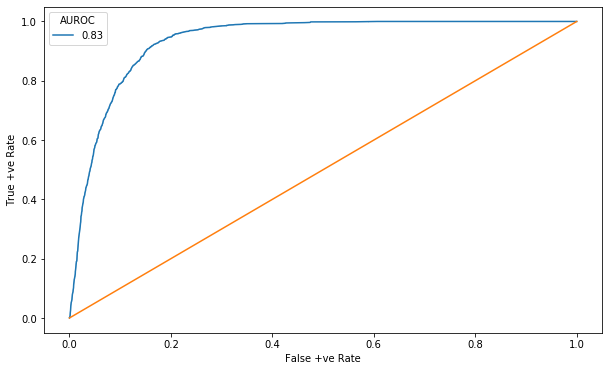

In [63]:
fpr, tpr, th=roc_curve(y_test, glm.predict_proba(X_test)[:,1])

sns.lineplot(fpr,tpr)
sns.lineplot([0,1], [0,1])
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend(title='AUROC', labels=[np.round(AUC,2)])

We will choose smote

glm2=sm.Logit(y_sm_train, X_sm_train).fit()

glm2.summary()

In [64]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_sm_train)
#Fitting sm.OLS model
model = sm.OLS(y_sm_train,X_1).fit()
sig_var=pd.DataFrame(data=model.pvalues[model.pvalues<=0.05],columns=['P-value']).reset_index()
print(model.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.528     
Dependent Variable:     Target              AIC:                   35907.3010
Date:                   2019-10-22 08:46    BIC:                   36137.1993
No. Observations:       51136               Log-Likelihood:        -17928.   
Df Model:               25                  F-statistic:           2285.     
Df Residuals:           51110               Prob (F-statistic):    0.00      
R-squared:              0.528               Scale:                 0.11810   
-----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025   0.975]
-----------------------------------------------------------------------------
const                       -9.8254   1.5159  -6.4816 0.0000 -12.7965 -6.8542
duration                     0.0007   0.0000 164.6653 0.0000   0.0007  0.0007
poutcome_

In [65]:
sig_var.rename(columns={'index':'significant_vars'}, inplace=True)
sig_var

,significant_vars,P-value
0,const,9.155590e-11
1,duration,0.000000e+00
2,poutcome_success,3.159872e-232
3,nr_employed,1.324326e-03
4,emp_var_rate,1.256240e-108
5,contact_telephone,3.698435e-24
6,month_may,5.789870e-214
7,previous_2,2.563665e-03
8,default_unknown,9.516933e-18
9,cons_price_idx,4.301454e-43


In [66]:
list(sig_var.significant_vars)

['const',
 'duration',
 'poutcome_success',
 'nr_employed',
 'emp_var_rate',
 'contact_telephone',
 'month_may',
 'previous_2',
 'default_unknown',
 'cons_price_idx',
 'month_mar',
 'month_oct',
 'previous_1',
 'cons_conf_idx',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'month_dec',
 'campaign',
 'marital_single',
 'education_university.degree']

In [67]:
X_sm_train=DF.loc[:,['const',
 'duration',
 'poutcome_success',
 'nr_employed',
 'emp_var_rate',
 'contact_telephone',
 'month_may',
 'previous_2',
 'default_unknown',
 'cons_price_idx',
 'month_mar',
 'month_oct',
 'previous_1',
 'cons_conf_idx',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'month_dec',
 'campaign',
 'marital_single',
 'education_university.degree']]
y_sm_train=DF.loc[:,'Target']

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10980
           1       0.44      0.88      0.58      1377

    accuracy                           0.86     12357
   macro avg       0.71      0.87      0.75     12357
weighted avg       0.92      0.86      0.88     12357



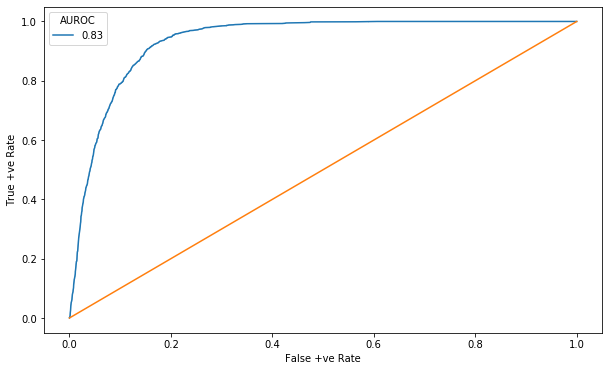

In [68]:
smt=SMOTE(random_state=1429, ratio=1, n_jobs=-1)

X_sm_train, y_sm_train = smt.fit_sample(X_train, y_train)
X_sm_train = pd.DataFrame(data=X_sm_train,columns=X_train.columns )
y_sm_train= pd.DataFrame(data=y_sm_train,columns=['Target'])

X_sm_train.shape

y_sm_train.shape
glm.fit(X_sm_train,y_sm_train)
psm=glm.predict(X_test)
print(classification_report(y_test, psm))

fpr, tpr, th=roc_curve(y_test, glm.predict_proba(X_test)[:,1])

sns.lineplot(fpr,tpr)
sns.lineplot([0,1], [0,1])
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend(title='AUROC', labels=[np.round(AUC,2)])


In [69]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'Target'],
      dtype='object')

Text(0.5, 33.0, 'Actual')

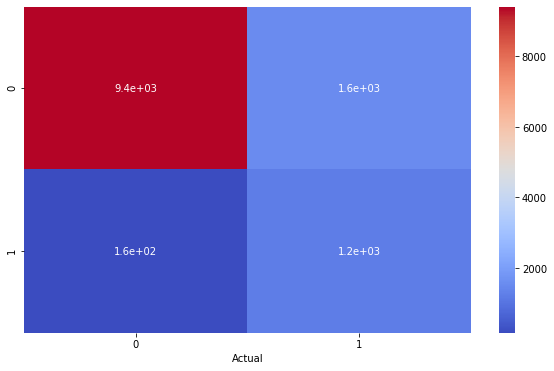

In [70]:
cm=confusion_matrix(y_test, psm)
ax=sns.heatmap(cm, annot=True,cmap='coolwarm')
ax.set_ylim(2,0)
plt.xlabel("Predicted")
plt.xlabel("Actual")

In [72]:
from sklearn.model_selection import StratifiedKFold

In [73]:
str_k_fold=StratifiedKFold()

In [74]:
rfe=RFECV(glm, cv=str_k_fold, scoring='accuracy', verbose=1, n_jobs=-1)

In [75]:
rfe.fit(X_sm_train, y_sm_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring='accuracy', step=1,
      verbose=1)

([<matplotlib.axis.XTick at 0x24b3ba39d88>,
 <a list of 25 Text xticklabel objects>)

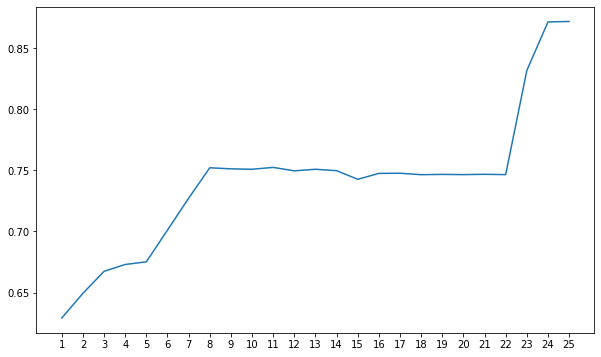

In [90]:
sns.lineplot(y=rfe.grid_scores_, x=range(1, len(rfe.grid_scores_)+1))
plt.xticks(range(1,len(rfe.grid_scores_)+1,1))

In [93]:
temp = pd.Series(rfe.support_,index = X_sm_train.columns)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)
selected_features_rfe.shape

Index(['duration', 'poutcome_success', 'euribor3m', 'nr_employed',
       'poutcome_nonexistent', 'emp_var_rate', 'contact_telephone',
       'month_may', 'previous_2', 'default_unknown', 'cons_price_idx',
       'month_mar', 'month_oct', 'previous_1', 'cons_conf_idx', 'month_sep',
       'job_blue-collar', 'previous_3', 'job_retired', 'job_student',
       'month_dec', 'campaign', 'marital_single',
       'education_university.degree', 'education_basic.9y'],
      dtype='object')


(25,)

In [94]:
X_sm_train.columns.shape

(25,)